In [1]:
!pip install transformers -q
!pip install matplotlib -q

## Load The Model

In [2]:
from transformers import pipeline
classifier = pipeline('zero-shot-classification',
                      model='facebook/bart-large-mnli')
hypothesis_template = 'This text is about {}.'

# Zero Shot Classification Example

1. Define CV content
2. Define Classes as textual descriptions (Any length)
3. Get scores of relevance

### CV/resume text

In [3]:
resume = '''
Base skills
I am a consultant in Artificial Intelligence and software engineering.
- Research: AI/ML/NLP/Image Processing/Signal Processing
- Development: ai-based solutions wrapped in production ready web services and standalone applications.

'''

### Skills you want to evaluate for

In [4]:
skills = ['Machine Learning', 
        'copywriting', 
        'gaming', 
        'Natural Language Processing',
        'blockchain',
        'front-end',
        'php',
        'risks management']

In [5]:
scored = classifier(resume, skills,
           hypothesis_template=hypothesis_template,
           multi_label=True)

# Scores 

Important note: NO ANY DIRECT MENTIONS of any label in the CV text itself

In [6]:
results = dict(zip(scored['labels'], scored['scores']))
results

{'Machine Learning': 0.4012615382671356,
 'Natural Language Processing': 0.28150954842567444,
 'blockchain': 0.011000248603522778,
 'copywriting': 0.0009284293046221137,
 'front-end': 0.03283776715397835,
 'gaming': 0.0008741150959394872,
 'php': 0.008403555490076542,
 'risks management': 0.006659574341028929}

# Classification / scoring results VISUALIZATION

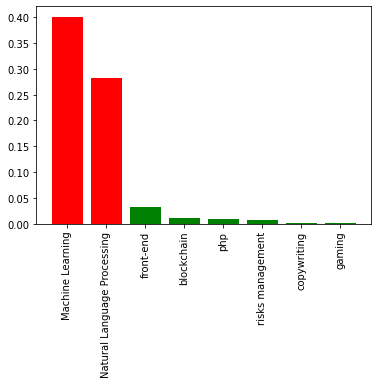

In [7]:
import matplotlib.pyplot as plt

data = results
names = list(data.keys())
values = list(data.values())
plt.xticks(rotation='vertical')

colors = ['red' if item>1/len(scored['scores']) else 'green' for item in scored['scores']] 

plt.bar(range(len(data)),values,tick_label=names, color=colors)

# plt.savefig('bar.png')
plt.show()